<h1 style="text-align: center;">Introduction to Modern Mathematical Modeling with R:</h1>
<h2 style="text-align: center;">A User's Manual to Train Mathematical Consultants<br></h2>

<h3 style="text-align: center;">A Cambridge University Press book</h3>
<h3 style="text-align: center;">by SSP Shen<br><br></h3>

<p style="text-align: center;">Compiled and Edited by Joaquin Stawsky</p>
<p style="text-align: center;">Momtaza Sayd Contributed to this Version of the Code</p>
<p style="text-align: center;">San Diego State University, August 2024</p>

## Chapter 6: Mathematical Modeling By Calculus
### Optimal Dimensions of Food Cans

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from netCDF4 import Dataset as ds
import sympy as smp
from sympy.utilities.lambdify import lambdify, implemented_function
import warnings
import os
os.chdir('/Users/momtaza/Desktop/RMathModel/data')

In [5]:
pfr = lambda r: 6*np.pi*r**3 + 9.4*np.pi*r**2 - 1456.88
opt.bisect(pfr, 0, 8)

3.796288736461065

### Optimal Production Level of Oil

In [6]:
def priFun(cee, bee, es):
    return lambda x: (cee*np.cos((x-bee)/2))/(x+es)**2

def revFun(cee, bee, es):
    return lambda x: x*(cee*30*np.cos((x-bee)/2))/(x+es)**2

In [7]:
c = 1e1
cp = 1e4
b = 8.5
s = 1

x = np.linspace(7.5, 11., 100)
price = priFun(cp,b,s)
revenue = revFun(c,b,s)

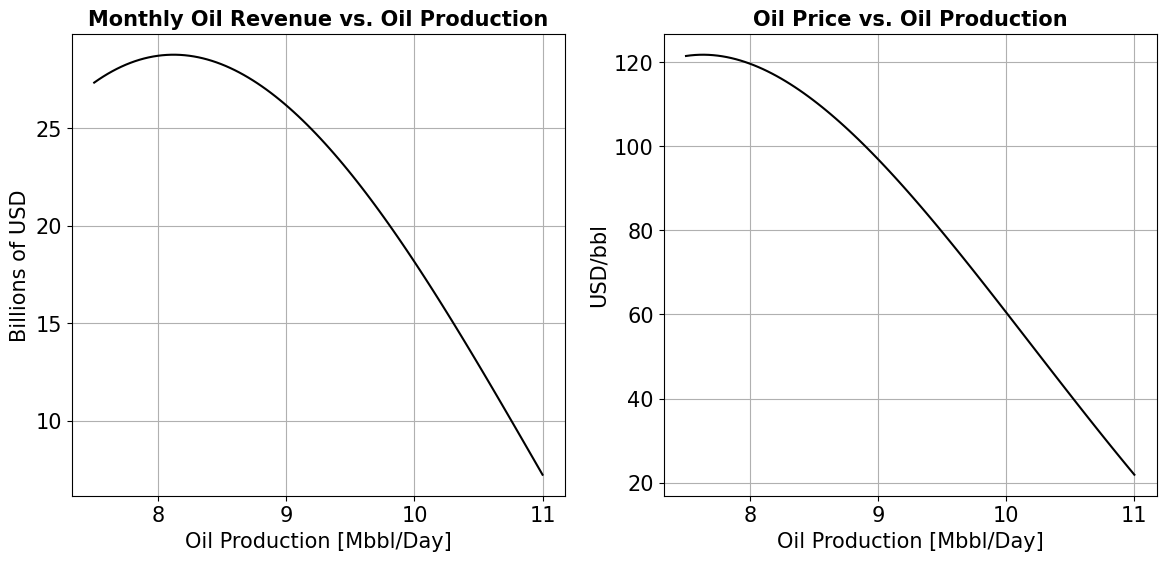

In [8]:
#Figure 6.6
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(x, revenue(x), 'k-')
ax[0].set_ylabel("Billions of USD",size = 15)
ax[0].set_xlabel("Oil Production [Mbbl/Day]", size = 15)
ax[0].set_title("Monthly Oil Revenue vs. Oil Production", 
                size=15,fontweight="bold")
ax[0].tick_params(labelsize=15)
ax[0].grid()

ax[1].plot(x, price(x), 'k-')
ax[1].set_ylabel("USD/bbl",size = 15)
ax[1].set_xlabel("Oil Production [Mbbl/Day]", size = 15)
ax[1].set_title("Oil Price vs. Oil Production", 
                size=15,fontweight="bold")
ax[1].tick_params(labelsize=15)
ax[1].grid()

#plt.savefig("OilRevenueVsProduction.jpg")

In [9]:
# maximum revenue amount
max(revenue(x))

28.759844116981323

In [10]:
t = smp.Symbol('t')
f = (c*30*t*smp.cos((t-b)/2))/(t+s)**2
fPrime = smp.diff(f,t)
fP = lambdify(t, fPrime)
root = opt.bisect(fP, 7.5, 11)
root

8.12005744597468

In [11]:
Rm = f*smp.exp((t-10)/2)
RmP = lambdify(t, smp.diff(Rm, t))
root2 = opt.bisect(RmP, 7.5, 11)
root2

9.891363335931828

In [12]:
def radEnergy(T, eiche, kaibee, sea):
        return lambda lam: (1e-12)*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T))-1))

In [14]:
h = 6.626070040e-34
kb = 1.3806488e-23
cl = 3e8

Ts = [5772, 5000, 4000]
fmt = ['b-', 'y-', 'r-']
lsty = ['--', '-', '.']
labs = ['T = 15 + 2 $\degree$C', 'T = 15 $\degree$C', 'T = 15 - 2 $\degree$C']
lamb = np.linspace(0, 3, 101)
lamb1 = np.linspace(0, 80, 101)
a3 = [True if .65 <= i < .8 else False for i in lamb]
a2 = [True if .53 <= i < .67 else False for i in lamb]
a1 = [True if .46 <= i < .55 else False for i in lamb]
a = [a1,a2,a3]
cols = ['blue', 'yellow', 'red']

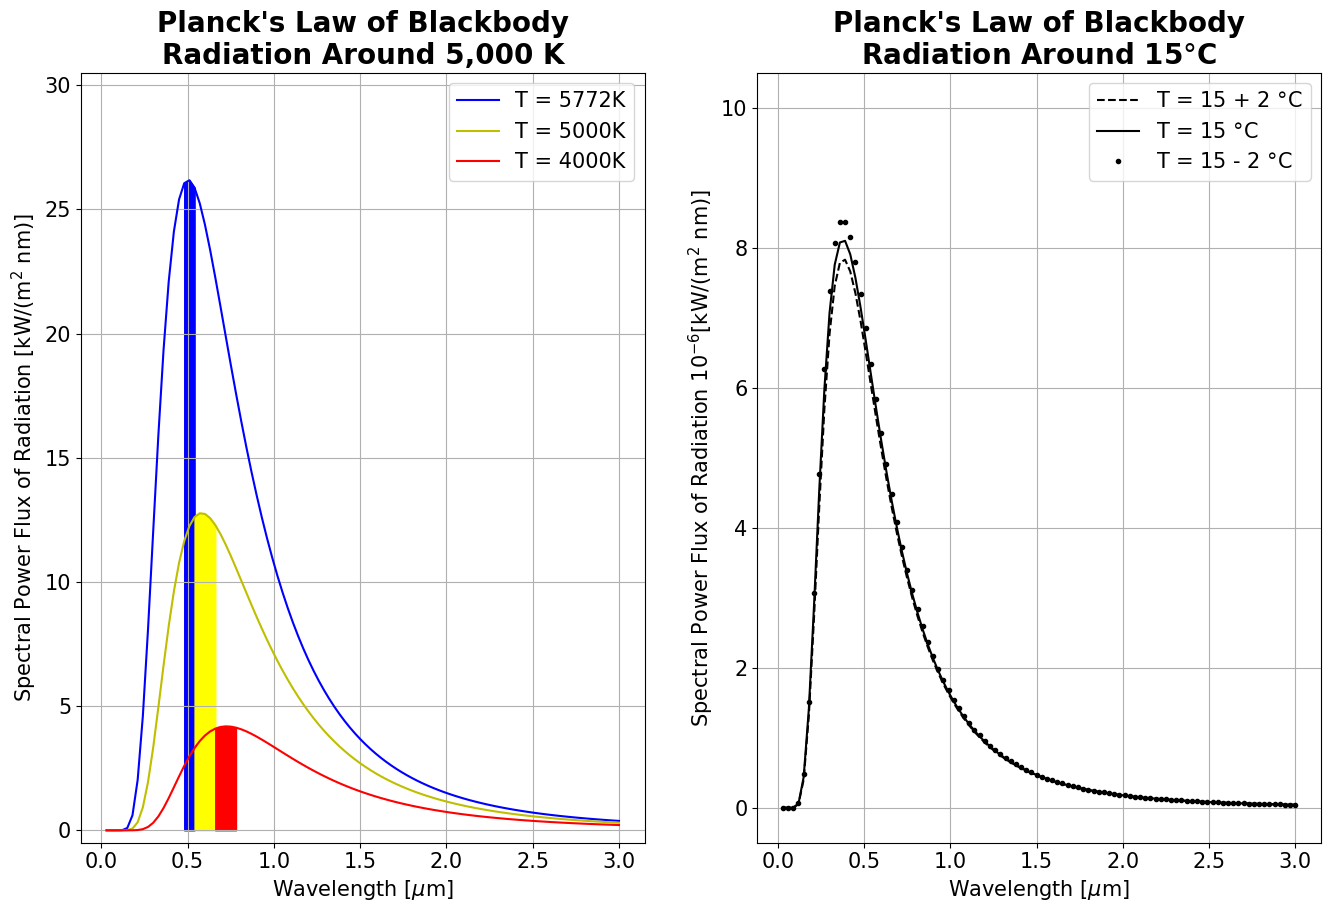

In [17]:
warnings.filterwarnings("ignore")
#Figure 6.7
fig, ax = plt.subplots(1,2, figsize=(16,10))

for (t, f, w, c) in zip(Ts, fmt, a, cols):
    func = radEnergy(t, h, kb, cl)
    ax[0].plot(lamb, func(lamb), f, label=f"T = {t}K")
    ax[0].fill_between(lamb, np.zeros(lamb.size),
                       func(lamb), where=w, color=c)

ax[0].set_ylabel("Spectral Power Flux of Radiation [kW/(m$^2$ nm)]", size=15)
ax[0].set_xlabel("Wavelength [$\mu$m]", size=15)
ax[0].set_title("Planck's Law of Blackbody\nRadiation Around 5,000 K",fontweight="bold",size=20)
ax[0].legend(loc='best', fontsize=15)
ax[0].set_ylim(0-.5, 30+.5)
ax[0].tick_params(labelsize=15)
ax[0].grid()

for (t,f,l) in zip(np.linspace(-2, 2, 3),lsty, labs):
    func = radEnergy(288.15 + t, h, kb, cl)
    ax[1].plot(lamb, 1e6*func(lamb1), 'k'+f, label=l);

ax[1].set_ylabel("Spectral Power Flux of Radiation $10^{-6}$[kW/(m$^2$ nm)]", size=15)
ax[1].set_xlabel("Wavelength [$\mu$m]", size=15)
ax[1].set_title("Planck's Law of Blackbody\nRadiation Around 15$\degree$C",fontweight="bold",size=20)
ax[1].legend(loc='best', fontsize=15)
ax[1].set_ylim(0-.5, 10+.5);
ax[1].tick_params(labelsize=15)
ax[1].grid()

#plt.savefig("BlackbodyRadiationEnergy.jpg")